<a href="https://colab.research.google.com/github/Somroy1993/Demo_asssignments_files/blob/main/AdaBinDemo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone 'https://github.com/shariqfarooq123/AdaBins'

Cloning into 'AdaBins'...
remote: Enumerating objects: 80, done.
remote: Total 80 (delta 0), reused 0 (delta 0), pack-reused 80
Unpacking objects: 100% (80/80), 558.92 KiB | 2.87 MiB/s, done.


In [2]:
%cd AdaBins

/content/AdaBins


In [3]:
"""
Download pretrained models
"""

!gdown https://drive.google.com/uc?id=1lvyZZbC9NLcS8a__YPcUP7rDiIpbRpoF
!gdown https://drive.google.com/uc?id=1HMgff-FV6qw1L0ywQZJ7ECa9VPq1bIoj
!mkdir pretrained
!mv AdaBins_nyu.pt pretrained/AdaBins_nyu.pt
!mv AdaBins_kitti.pt pretrained/AdaBins_kitti.pt

Downloading...
From: https://drive.google.com/uc?id=1lvyZZbC9NLcS8a__YPcUP7rDiIpbRpoF
To: /content/AdaBins/AdaBins_nyu.pt
100% 941M/941M [00:05<00:00, 180MB/s]
Downloading...
From: https://drive.google.com/uc?id=1HMgff-FV6qw1L0ywQZJ7ECa9VPq1bIoj
To: /content/AdaBins/AdaBins_kitti.pt
100% 941M/941M [00:07<00:00, 132MB/s]


In [4]:
from infer import InferenceHelper
from PIL import Image
import matplotlib.pyplot as plt

Loading base model ()...

/usr/local/lib/python3.10/dist-packages/torch/hub.py:286: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/rwightman/gen-efficientnet-pytorch/zipball/master" to /root/.cache/torch/hub/master.zip
Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-weights/tf_efficientnet_b5_ap-9e82fae8.pth" to /root/.cache/torch/hub/checkpoints/tf_efficientnet_b5_ap-9e82fae8.pth


Done.
Removing last two layers (global_pool & classifier).
Building Encoder-Decoder model..Done.


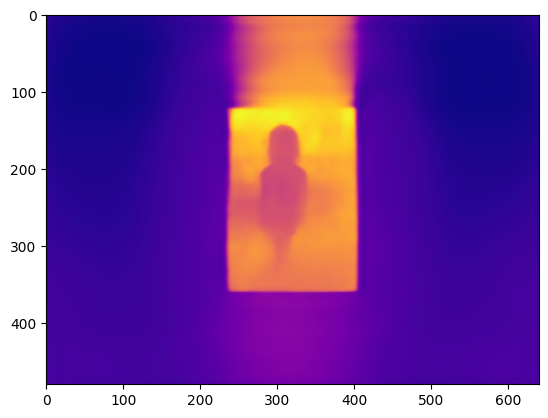

In [5]:
"""
predictions using nyu dataset
"""
import os
path = 'test_imgs'
infer_helper = InferenceHelper(dataset='nyu')

# predict depth of a single pillow image
for file in os.listdir(path):
  if file.endswith(".jpg"):
    img = Image.open(os.path.join(path, file))  # any rgb pillow image
    bin_centers, predicted_depth = infer_helper.predict_pil(img)
    plt.imsave("depth_"+file, predicted_depth[0][0])

plt.imshow(predicted_depth[0][0], cmap='plasma')
plt.show()

Loading base model ()...

Using cache found in /root/.cache/torch/hub/rwightman_gen-efficientnet-pytorch_master


Done.
Removing last two layers (global_pool & classifier).
Building Encoder-Decoder model..Done.


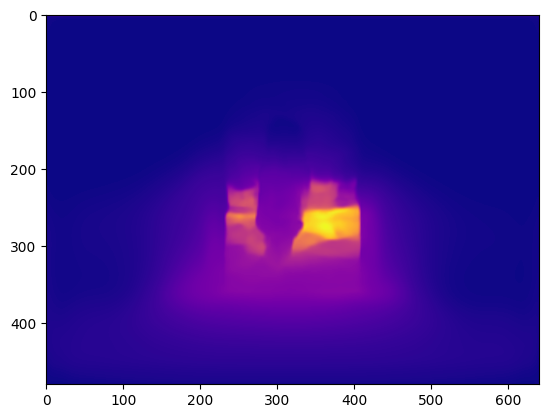

In [6]:
"""
predictions using kitti dataset
"""
import os
path = 'test_imgs'
infer_helper = InferenceHelper(dataset='kitti')

# predict depth of a single pillow image
for file in os.listdir(path):
  if file.endswith(".jpg"):
    img = Image.open(os.path.join(path, file))  # any rgb pillow image
    bin_centers, predicted_depth = infer_helper.predict_pil(img)
    plt.imsave("depth_kitti_"+file, predicted_depth[0][0])
plt.imshow(predicted_depth[0][0], cmap='plasma')
plt.show()